In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns

In [2]:
#setup data correctly
#Import data
df_wiki = pd.read_csv("error_wiki_test.csv")
df_utk_uncrop = pd.read_csv("utk_uncropped_age_predictions.csv")
df_utk_crop = pd.read_csv("utk_face_predictions.csv")

#retrained model outputs
df_retrain_adam = pd.read_csv("error_wiki_test_utk_adam.csv")
df_retrain_adam_dup = pd.read_csv("utk_uncropped_retrained_age_adam_with_dup.csv")
df_retrain_adam_dup3 = pd.read_csv("utk_uncropped_retrained_age_adam_with_dup_x3.csv")


#drop colunmns and tag correctly
df_wiki = df_wiki.drop(["Unnamed: 0"], axis=1)

df_utk_uncrop = df_utk_uncrop.drop(["Unnamed: 0", "date&time", "filename"], axis=1)
df_utk_uncrop["race"] = df_utk_uncrop["race"].replace({0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Other"})
df_utk_uncrop["gender"] = df_utk_uncrop["gender"].replace({0:"Female", 1:"Male"})

df_retrain_adam = df_retrain_adam.drop(["Unnamed: 0", "filename", "pixels"], axis=1)
df_retrain_adam["race"] = df_retrain_adam["race"].replace({0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Other"})
df_retrain_adam["gender"] = df_retrain_adam["gender"].replace({0:"Female", 1:"Male"})

df_retrain_adam_dup = df_retrain_adam_dup.drop(["Unnamed: 0", "filename", "pixels"], axis=1)
df_retrain_adam_dup["race"] = df_retrain_adam_dup["race"].replace({0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Other"})
df_retrain_adam_dup["gender"] = df_retrain_adam_dup["gender"].replace({0:"Female", 1:"Male"})

df_retrain_adam_dup3 = df_retrain_adam_dup3.drop(["Unnamed: 0", "filename", "pixels"], axis=1)
df_retrain_adam_dup3["race"] = df_retrain_adam_dup3["race"].replace({0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Other"})
df_retrain_adam_dup3["gender"] = df_retrain_adam_dup3["gender"].replace({0:"Female", 1:"Male"})

### Data Overview

In [3]:
df_utk_uncrop["race"].value_counts()

White     8358
Black     4306
Indian    3417
Asian     2449
Other     1206
Name: race, dtype: int64

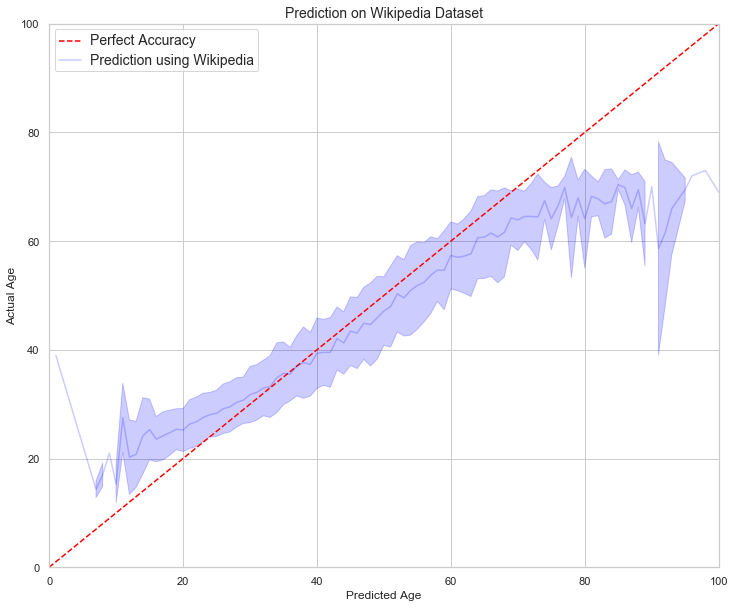

RMSE:  7.2
MAE : 5.3


In [4]:
# Plot how the wiki predictions perform 
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

r = range(0,101)
plt.plot(r, r, color = 'red', linestyle = "--", label="Perfect Accuracy")
sns.lineplot(x="Actual", y="Prediction", data=df_wiki, ci="sd", alpha=0.2, color = "blue", 
             label="Prediction using Wikipedia")

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])
plt.legend(numpoints=1, loc='best')
plt.title('Prediction on Wikipedia Dataset', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')
plt.show()

Y_actual = df_wiki["Actual"]
Y_pred = df_wiki["Prediction"]

rmse = math.sqrt(mean_squared_error(Y_actual, Y_pred))
mae = mean_absolute_error(Y_actual, Y_pred)

print("RMSE: ", round(rmse,1))
print("MAE : " + str(round(mae,1)))

C:\Users\sebas\.conda\envs\jerry\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


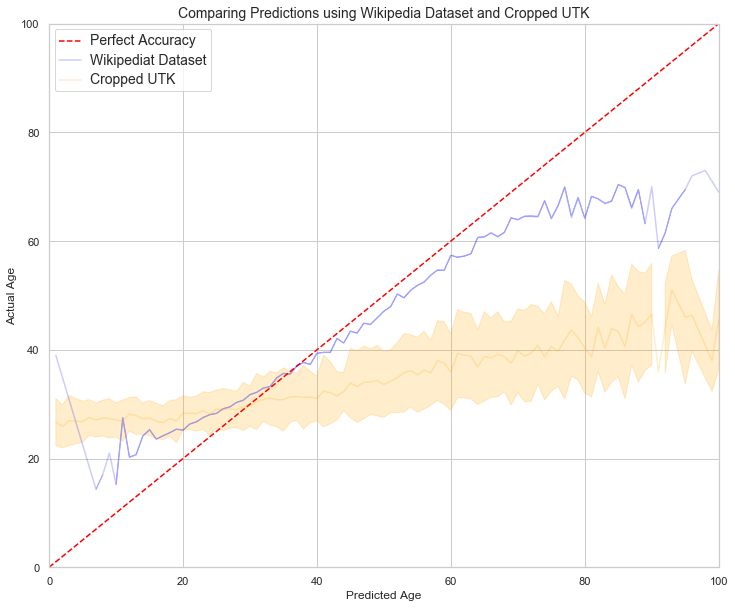

RMSE:  20.7
MAE : 17.4


In [5]:
# Plot the responses for different events and regions
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

r = range(0,101)
plt.plot(r, r, color = 'red', linestyle = "--", label="Perfect Accuracy")
sns.lineplot(x="Actual", y="Prediction", data=df_wiki, alpha=0.2, ci=1, color = "blue", label="Wikipediat Dataset")
sns.lineplot(x="age", y="pre_age", data=df_utk_crop, ci="sd", alpha=0.2, color = "orange", label="Cropped UTK")

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])
plt.legend(numpoints=1, loc='best')
plt.title('Comparing Predictions using Wikipedia Dataset and Cropped UTK', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')
plt.show()

Y_actual = df_utk_crop["age"]
Y_pred = df_utk_crop["pre_age"]

rmse = math.sqrt(mean_squared_error(Y_actual, Y_pred))
mae = mean_absolute_error(Y_actual, Y_pred)

print("RMSE: ", round(rmse,1))
print("MAE : " + str(round(mae,1)))

C:\Users\sebas\.conda\envs\jerry\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


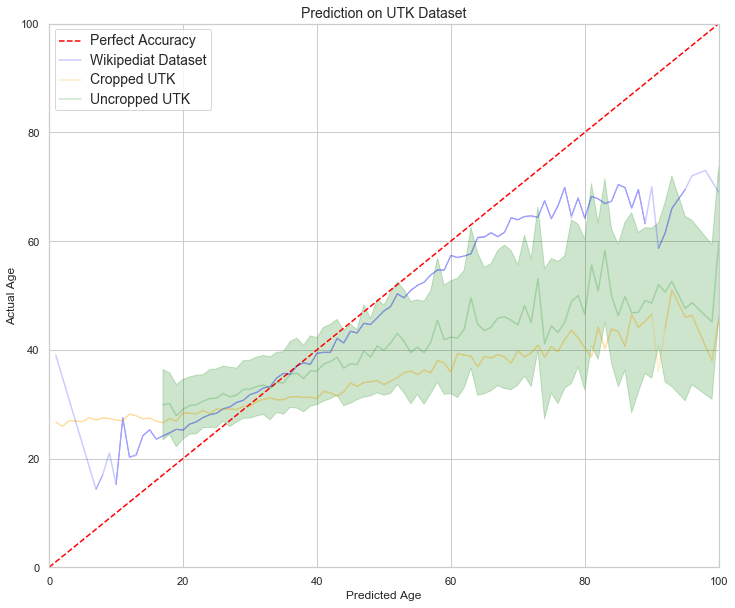

RMSE:  14.4
MAE : 10.1


In [6]:
# Plot the responses for different events and regions
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

r = range(0,101)
plt.plot(r, r, color = 'red', linestyle = "--", label="Perfect Accuracy")
sns.lineplot(x="Actual", y="Prediction", data=df_wiki, ci=1, alpha=0.2, color = "blue", label="Wikipediat Dataset")
sns.lineplot(x="age", y="pre_age", data=df_utk_crop, ci=1, alpha=0.2, color = "orange", label="Cropped UTK")
sns.lineplot(x="age", y="pre_age", data=df_utk_uncrop, ci="sd", alpha=0.2, color = "green", label="Uncropped UTK")

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])
plt.legend(numpoints=1, loc='best')
plt.title('Prediction on UTK Dataset', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')
plt.show()

Y_actual = df_utk_uncrop["age"]
Y_pred = df_utk_uncrop["pre_age"]

rmse = math.sqrt(mean_squared_error(Y_actual, Y_pred))
mae = mean_absolute_error(Y_actual, Y_pred)

print("RMSE: ", round(rmse,1))
print("MAE : " + str(round(mae,1)))

C:\Users\sebas\.conda\envs\jerry\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


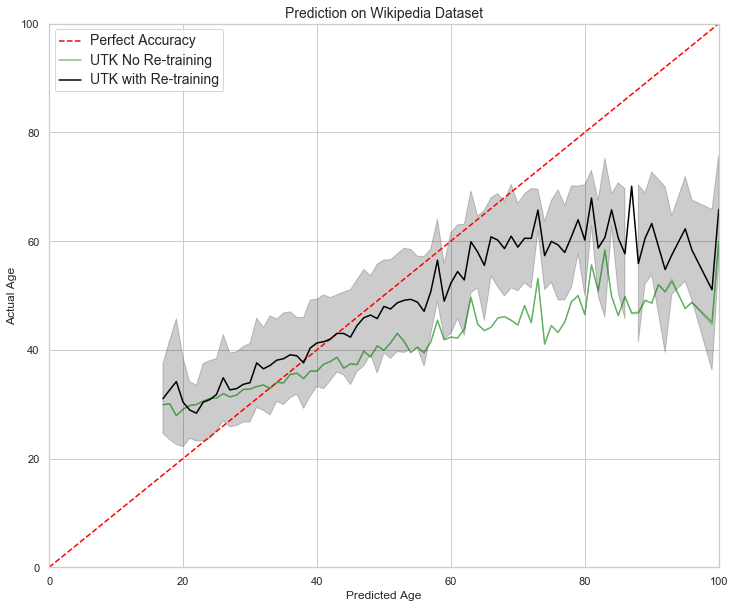

MAE ArgMax: 8.7
RMSE ArgMax:  13.6
MAE Weighted Avg: 8.4
RMSE Weighted Avg:  11.3


In [7]:
### Using ADAM ORIGINAL DATA
# Plot the responses for different events and regions
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

r = range(0,101)
plt.plot(r, r, color = 'red', linestyle = "--", label="Perfect Accuracy")
sns.lineplot(x="age", y="pre_age", data=df_utk_uncrop, ci=1, alpha=0.5, color = "green", label="UTK No Re-training")
sns.lineplot(x="age", y="Weighted_Avg", data=df_retrain_adam, ci="sd", alpha=1, color = "black", label="UTK with Re-training")

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])
plt.legend(numpoints=1, loc='best')
plt.title('Prediction on Wikipedia Dataset', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')
plt.show()

Y_actual = df_retrain_adam["age"]
Y_pred_WA = df_retrain_adam["Weighted_Avg"]
Y_pred_ArgMax = df_retrain_adam["ArgMax"]


rmse_WA = math.sqrt(mean_squared_error(Y_actual, Y_pred_WA))
mae_WA = mean_absolute_error(Y_actual, Y_pred_WA)
rmse_ArgMax = math.sqrt(mean_squared_error(Y_actual, Y_pred_ArgMax))
mae_ArgMax = mean_absolute_error(Y_actual, Y_pred_ArgMax)

print("MAE ArgMax: " + str(round(mae_ArgMax,1)))
print("RMSE ArgMax: ", round(rmse_ArgMax,1))
print("MAE Weighted Avg: " + str(round(mae_WA,1)))
print("RMSE Weighted Avg: ", round(rmse_WA,1))

#### Comparison of re-train, dup, triple

In [8]:
#Re-train
Y_actual = df_retrain_adam["age"]
Y_pred_WA = df_retrain_adam["Weighted_Avg"]

mae_WA = mean_absolute_error(Y_actual, Y_pred_WA)
rmse_WA = math.sqrt(mean_squared_error(Y_actual, Y_pred_WA))

print("Re-train MAE Weighted Avg: " + str(round(mae_WA,1)))
print("Re-train RMSE Weighted Avg: ", round(rmse_WA,1))

#2x Older People MAE and RMSE
Y_actual = df_retrain_adam_dup["age"]
Y_pred_WA = df_retrain_adam_dup["Weighted_Avg"]

mae_WA = mean_absolute_error(Y_actual, Y_pred_WA)
rmse_WA = math.sqrt(mean_squared_error(Y_actual, Y_pred_WA))

print("2x 60+ MAE Weighted Avg: " + str(round(mae_WA,1)))
print("2x 60+ RMSE Weighted Avg: ", round(rmse_WA,1))

#3x Older people MAE and RMSE
Y_actual = df_retrain_adam_dup3["age"]
Y_pred_WA = df_retrain_adam_dup3["Weighted_Avg"]

mae_WA = mean_absolute_error(Y_actual, Y_pred_WA)
rmse_WA = math.sqrt(mean_squared_error(Y_actual, Y_pred_WA))

print("3x 60+ MAE Weighted Avg: " + str(round(mae_WA,1)))
print("3x 60+ RMSE Weighted Avg: ", round(rmse_WA,1))

Re-train MAE Weighted Avg: 8.4
Re-train RMSE Weighted Avg:  11.3
2x 60+ MAE Weighted Avg: 7.9
2x 60+ RMSE Weighted Avg:  10.9
3x 60+ MAE Weighted Avg: 7.8
3x 60+ RMSE Weighted Avg:  10.9


### DEEP DIVE INTO Re-TRAINED MODEL

#### Gender

C:\Users\sebas\.conda\envs\jerry\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


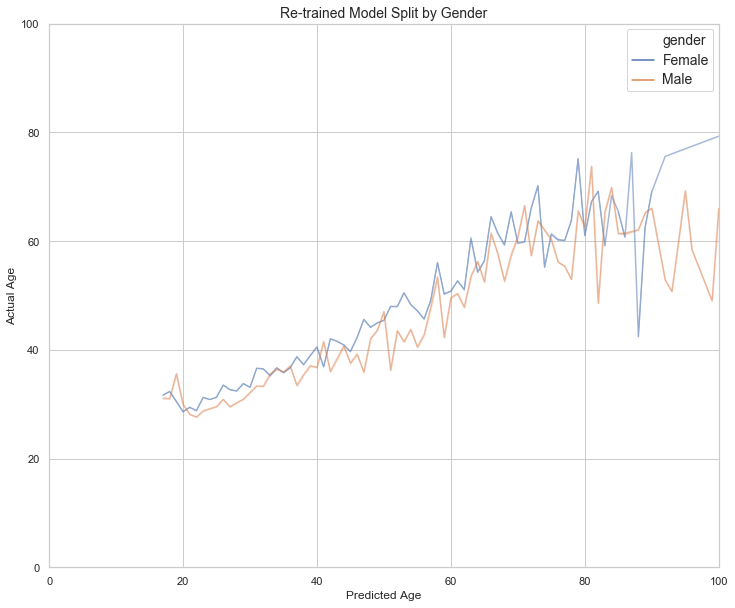

In [9]:
#By Gender

# Plot the responses for different events and regions
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

sns.lineplot(x="age", y="Weighted_Avg", hue="gender", data=df_retrain_adam_dup3, ci=1, alpha=0.5)

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])

plt.title('Re-trained Model Split by Gender', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')

plt.show()

### Races

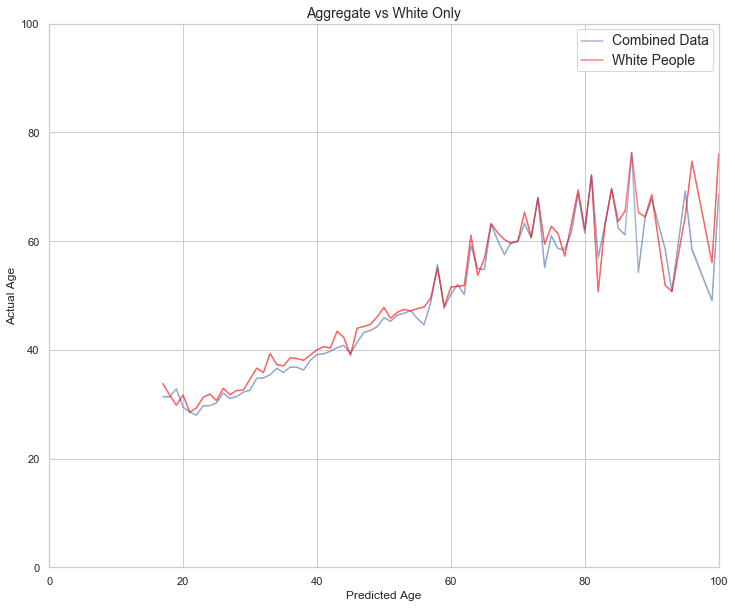

In [10]:
# Race = White
mask = df_retrain_adam_dup3["race"] == "White"
race = df_retrain_adam_dup3[mask]

# Plot the responses for different events and regions
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

sns.lineplot(x="age", y="Weighted_Avg", data=df_retrain_adam_dup3, ci=1, alpha=0.5, label="Combined Data")
sns.lineplot(x="age", y="Weighted_Avg", data=race, ci=1, color= 'red', alpha=0.5, label="White People")

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])
plt.legend(numpoints=1, loc='best')
plt.title('Aggregate vs White Only', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')
plt.show()

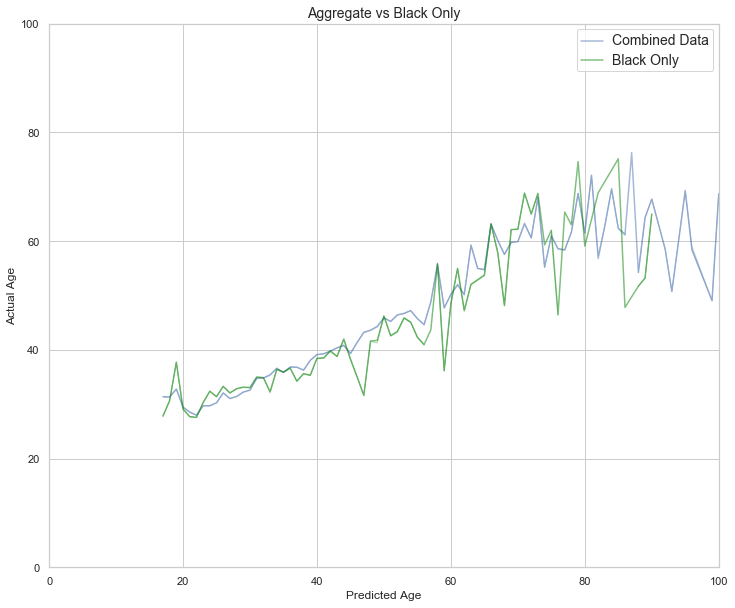

In [11]:
# Race = Black
mask = df_retrain_adam_dup3["race"] == "Black"
race = df_retrain_adam_dup3[mask]

# Plot the responses for different events and regions
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

sns.lineplot(x="age", y="Weighted_Avg", data=df_retrain_adam_dup3, ci=1, alpha=0.5, label="Combined Data")
sns.lineplot(x="age", y="Weighted_Avg", data=race, ci=1, color= 'green', alpha=0.5, label="Black Only")

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])
plt.legend(numpoints=1, loc='best')
plt.title('Aggregate vs Black Only', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')
plt.show()

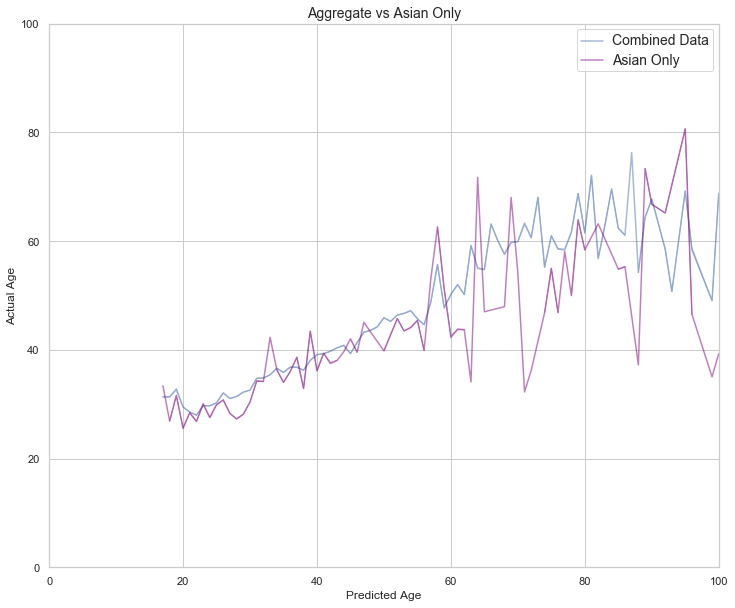

In [12]:
# Race = Asian
mask = df_retrain_adam_dup3["race"] == "Asian"
race = df_retrain_adam_dup3[mask]

# Plot the responses for different events and regions
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

sns.lineplot(x="age", y="Weighted_Avg", data=df_retrain_adam_dup3, ci=1, alpha=0.5, label="Combined Data")
sns.lineplot(x="age", y="Weighted_Avg", data=race, ci=1, color= 'purple', alpha=0.5, label="Asian Only")

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])
plt.legend(numpoints=1, loc='best')
plt.title('Aggregate vs Asian Only', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')
plt.show()

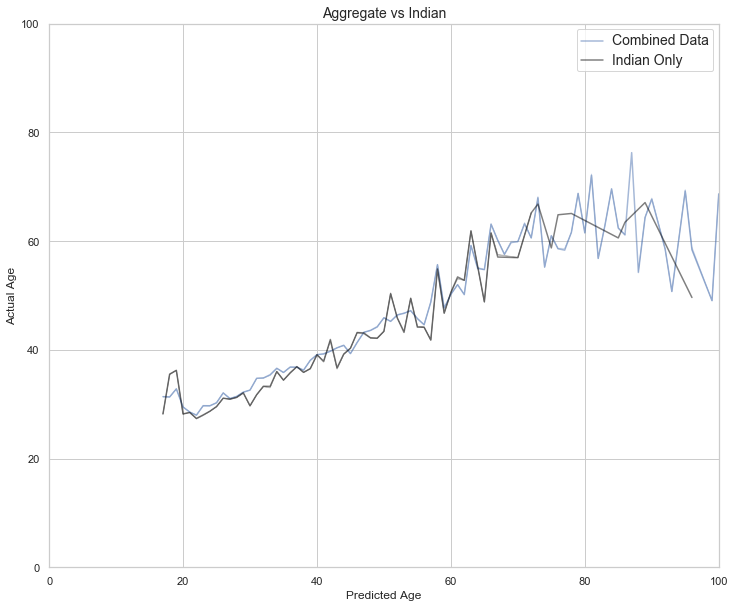

In [13]:
# Race = Indian
mask = df_retrain_adam_dup3["race"] == "Indian"
race = df_retrain_adam_dup3[mask]

# Plot the responses for different events and regions
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

sns.lineplot(x="age", y="Weighted_Avg", data=df_retrain_adam_dup3, ci=1, alpha=0.5, label="Combined Data")
sns.lineplot(x="age", y="Weighted_Avg", data=race, ci=1, color= 'black', alpha=0.5, label="Indian Only")

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])

plt.legend(numpoints=1, loc='best')
plt.title('Aggregate vs Indian', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')

plt.show()

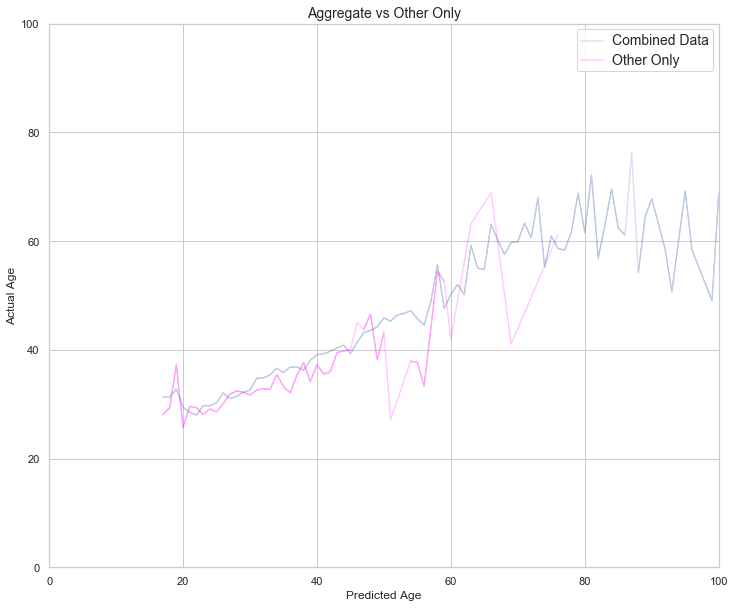

RMSE:  7.9
MAE : 6.0


In [14]:
# Race = Other
mask = df_retrain_adam_dup3["race"] == "Other"
race = df_retrain_adam_dup3[mask]

# Plot the responses for different events and regions
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")

sns.lineplot(x="age", y="Weighted_Avg", data=df_retrain_adam_dup3, ci=1, alpha=0.2, label= "Combined Data")
sns.lineplot(x="age", y="Weighted_Avg", data=race, ci=1, color= 'magenta', alpha=0.2, label="Other Only")

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])
plt.legend(numpoints=1, loc='best')
plt.title('Aggregate vs Other Only', fontsize='14')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.setp(axes.get_legend().get_texts(), fontsize='14')

plt.show()

Y_actual = race["age"]
Y_pred = race["Weighted_Avg"]

rmse = math.sqrt(mean_squared_error(Y_actual, Y_pred))
mae = mean_absolute_error(Y_actual, Y_pred)

print("RMSE: ", round(rmse,1))
print("MAE : " + str(round(mae,1)))

### CORRECTION MODEL

## Correcting Bias using orig predicted age, actual gender and actual race

In [15]:
df_retrain_adam_dup3.head()

,age,gender,race,Weighted_Avg,ArgMax
0,26,Female,Other,29.530177,26
1,40,Female,White,39.752235,40
2,19,Female,Asian,30.157920,22
3,29,Female,Asian,27.181044,23
4,26,Male,Black,27.079226,26


In [16]:
#Set up data for training
X = pd.get_dummies(df_retrain_adam_dup3, columns=['race']).drop(["age", "ArgMax"], axis=1)
X["gender"] = X["gender"].replace({"Female":0, "Male":1})
Y = df_retrain_adam_dup3["age"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 11)

#### Linear Regression

In [17]:
linear = LinearRegression()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))

print("Intercept: " + str(linear.intercept_) + " Coef: " + str(linear.coef_))
print("MAE : " + str(round(mae,5)))
print("RMSE : " + str(round(rmse,5)))

Intercept: 0.14618288817489855 Coef: [ 0.03935992  0.98664007  1.15132598 -1.09039648  0.2439884  -1.99170697
  1.68678906]
MAE : 8.11509
RMSE : 11.3678


#### Linear Regression with Feature Engineering

In [18]:
def over60(x):
    if x >= 60:
        return 1
    else:
        return 0

X_train["over_60"] = X_train["Weighted_Avg"].apply(over60)
X_test["over_60"] = X_test["Weighted_Avg"].apply(over60)
    
linear = LinearRegression()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))

print("Intercept: " + str(linear.intercept_) + " Coef: " + str(linear.coef_))
print("MAE : " + str(round(mae,5)))
print("RMSE : " + str(round(rmse,5)))

Intercept: 0.6275498525804508 Coef: [-0.00345562  0.97269258  1.13591866 -1.08631352  0.2564548  -2.01030216
  1.70424223  0.81460608]
MAE : 8.10976
RMSE : 11.36245


C:\Users\sebas\.conda\envs\jerry\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sebas\.conda\envs\jerry\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Regularization

In [19]:
#See if regularization improves Error
from sklearn.linear_model import Lasso
alpha = [0.01, 0.1, 0, 1, 10, 100, 1000]
MAE = []
lowest_mae = 1000
lowest_rmse = 1000
for a in alpha:
    clf = Lasso(alpha = a)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))
    MAE.append(mae)
    if mae < lowest_mae:
        lowest_mae = mae
    if rmse < lowest_rmse:
        lowest_rmse = rmse

from sklearn.linear_model import Ridge
alpha = [0.01, 0.1, 0, 1, 10, 100, 1000]
for a in alpha:
    clf = Ridge(alpha = a)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))
    MAE.append(mae)
    if mae < lowest_mae:
        lowest_mae = mae
    if rmse < lowest_rmse:
        lowest_rmse = rmse

print(MAE)
print(lowest_mae, lowest_rmse)

[8.108278506886199, 8.102073195985518, 8.1097616530593, 8.11931359696602, 8.226567973199518, 11.07767021068025, 13.750378988909302, 8.109760477361553, 8.10974989788084, 8.109761653059302, 8.109644281230999, 8.1086236857542, 8.10372352945655, 8.097182593207746]
8.097182593207746 11.362453005620598


C:\Users\sebas\.conda\envs\jerry\lib\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
C:\Users\sebas\.conda\envs\jerry\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\sebas\.conda\envs\jerry\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232484.25218690687, tolerance: 112.32673874396137
  positive)
C:\Users\sebas\.conda\envs\jerry\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.055974e-19
  overwrite_a=True).T


#### Random Forest

In [20]:
#Test multiple RF models
from sklearn.model_selection import GridSearchCV
max_depth = [4, 8, 32, 64] #depth of each tree in forest
n_estimators = [200, 500] #number of trees in the forest

param_grid = dict(max_depth = max_depth, n_estimators = n_estimators)
model = RandomForestRegressor(random_state=1)
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)
Y_pred = grid_result.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))

print("MAE : " + str(round(mae,5)))
print("RMSE : " + str(round(rmse,5)))

MAE : 8.09102
RMSE : 11.37084


#### Polynomial

In [21]:
#Fit data to a polynomial 
mae_list = []
rmse_list = []
poly_list = [2,3,4,5]

for p in poly_list:
    poly = PolynomialFeatures(degree=p)
    X_train_P = poly.fit_transform(X_train)
    X_test_P = poly.fit_transform(X_test)

    #run model
    reg = linear_model.LinearRegression()
    reg.fit(X_train_P, Y_train)
    y_pred_x_test_P = reg.predict(X_test_P)
    # print("Coef: " + str(reg.coef_))
    # print("Intercept: " + str(reg.intercept_))

    #Analyze model fit
    mae = mean_absolute_error(Y_test, y_pred_x_test_P)
    rmse = math.sqrt(mean_squared_error(Y_test, y_pred_x_test_P))
    mae_list.append(mae)
    rmse_list.append(rmse)  

best_poly = (np.argmin(rmse_list)+2)
    
print("MAEs: ")
print(*mae_list)
print("RMSEs: ")
print(*rmse_list)
print("Best polynomial is: ", best_poly)

MAEs: 
8.055272672973436 8.028749216871237 8.074812740286822 8.08479832643517
RMSEs: 
11.312033897671837 11.311241744816394 11.422271331454922 11.456138277314345
Best polynomial is:  3


In [22]:
poly = PolynomialFeatures(degree=2)
X_train_best = poly.fit_transform(X_train)
X_test_best = poly.fit_transform(X_test)

reg = linear_model.LinearRegression()
reg.fit(X_train_best, Y_train)
y_pred_x_test_P = reg.predict(X_test_best)

reg.coef_

array([-5.94848812e-13,  1.56205296e-01,  6.93160419e-01, -1.54203366e+00,
        2.37383645e+00, -1.89500382e+00,  2.33982629e+00, -1.27662526e+00,
       -2.09562199e-02,  1.56205296e-01, -3.70726049e-02, -1.86151436e+00,
        4.31529597e-01,  1.62877111e+00, -1.15156773e+00,  1.10898668e+00,
        4.75387201e+00,  1.25875287e-03,  2.93464661e-01, -2.49613056e-02,
        2.39698333e-01, -5.60738923e-02,  2.41032623e-01,  1.64615031e-02,
       -1.54203366e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.03364414e-01,  2.37383645e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.58308623e-01, -1.89500382e+00,
        0.00000000e+00,  0.00000000e+00, -7.39868105e+00,  2.33982629e+00,
        0.00000000e+00,  1.12442508e+01, -1.27662526e+00, -3.82147020e+00,
       -2.09562199e-02])

In [23]:
from sklearn.neighbors import KNeighborsRegressor
neigh = list(range(2, 51))
lowest_mae = 1000
lowest_rmse = 1000
best_neighbor = 0

for n in neigh: 
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))
    if mae < lowest_mae:
        lowest_mae = mae
        best_neighbor = n
    if rmse < lowest_rmse:
        lowest_rmse = rmse
    
print(lowest_mae, lowest_rmse, best_neighbor)

8.079584171696848 11.411690186940922 42


### Business Rules Approach - using a Heuristic

In [24]:
#Creating age brackets
df_retrain_adam_dup3["age_bracket"] = np.where((df_retrain_adam_dup3["Weighted_Avg"] < 25),"16-25", 
                              np.where((df_retrain_adam_dup3["Weighted_Avg"] >= 25) & (df_retrain_adam_dup3["Weighted_Avg"] < 40), "25-39",
                                       np.where((df_retrain_adam_dup3["Weighted_Avg"] >= 40) & (df_retrain_adam_dup3["Weighted_Avg"] < 60), "40-59",
                                                np.where((df_retrain_adam_dup3["Weighted_Avg"] >= 60), "60+","error"))))

#Concatenate gender and race
df_retrain_adam_dup3["gender_race"] = df_retrain_adam_dup3["gender"] + " - " + df_retrain_adam_dup3["race"]
df_retrain_adam_dup3.head()

,age,gender,race,Weighted_Avg,ArgMax,age_bracket,gender_race
0,26,Female,Other,29.530177,26,25-39,Female - Other
1,40,Female,White,39.752235,40,25-39,Female - White
2,19,Female,Asian,30.157920,22,25-39,Female - Asian
3,29,Female,Asian,27.181044,23,25-39,Female - Asian
4,26,Male,Black,27.079226,26,25-39,Male - Black


In [25]:
#Calc how wrong each prediction is
df_retrain_adam_dup3["delta"] = df_retrain_adam_dup3["age"] - df_retrain_adam_dup3["Weighted_Avg"]
df = df_retrain_adam_dup3.groupby(["gender_race", "age_bracket"])[["delta"]].mean().unstack(level=-1).reset_index()
df = df.set_index("gender_race")

In [26]:
df.columns = ["16-25", "25-39", "40-59", "60+"]
df_retrain_adam_dup3['age_correction'] = float(0)

for i in list(range(0, len(df_retrain_adam_dup3))):
    df_retrain_adam_dup3['age_correction'][i] = df[df_retrain_adam_dup3['age_bracket'][i]][df_retrain_adam_dup3['gender_race'][i]]

df_retrain_adam_dup3.head()

C:\Users\sebas\.conda\envs\jerry\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,age,gender,race,Weighted_Avg,ArgMax,age_bracket,gender_race,delta,age_correction
0,26,Female,Other,29.530177,26,25-39,Female - Other,-3.530177,-1.322642
1,40,Female,White,39.752235,40,25-39,Female - White,0.247765,1.019702
2,19,Female,Asian,30.157920,22,25-39,Female - Asian,-11.157920,1.964620
3,29,Female,Asian,27.181044,23,25-39,Female - Asian,1.818956,1.964620
4,26,Male,Black,27.079226,26,25-39,Male - Black,-1.079226,0.087619


In [27]:
df_retrain_adam_dup3["revised_age_prediction"] = df_retrain_adam_dup3["Weighted_Avg"] + df_retrain_adam_dup3["age_correction"]

Y_actual = df_retrain_adam_dup3["age"]
Y_pred = df_retrain_adam_dup3["revised_age_prediction"]

mae = mean_absolute_error(Y_actual, Y_pred)
rmse = math.sqrt(mean_squared_error(Y_actual, Y_pred))

print("MAE With Correction Model: ", str(round(mae,1)))
print("RMSE With Correction Model: ", round(rmse,1))

MAE With Correction Model:  7.7
RMSE With Correction Model:  10.7
